# Step 1: Business Understanding

## Objective

Syriatel is a telecommunications company experiencing a growing concern over customer churn, which refers to the loss of clients or subscribers. The goal of this project is to build a machine learning model that accurately predicts whether a customer is likely to churn based on their behavior and service usage history.

By identifying high-risk customers early, Syriatel can implement proactive retention strategies, such as targeted offers, discounts, or personalized support.

## Problem Statement

Customer churn has a direct impact on company revenue and growth. Acquiring a new customer is often more expensive than retaining an existing one. Syriatel seeks to leverage historical customer data to develop a predictive model that classifies customers into two categories:

- **Churn = True**: Customers who are likely to leave the service.
- **Churn = False**: Customers who are expected to stay.

## Goals

- Understand the factors that contribute to customer churn.
- Build a reliable classification model using historical customer data.
- Provide actionable insights and recommendations to reduce churn rates.
- Deploy the model in a way that integrates with Syriatel’s customer relationship management (CRM) systems for real-time retention action.

## Success Criteria

- A trained model with acceptable classification performance (e.g., accuracy, precision, recall).
- A clean, reproducible notebook that explains each step clearly.
- Data preprocessed using pipelines to prevent leakage and ensure future scalability.
- A summary of the top churn indicators to assist business teams in retention strategy.


# Step 2: Data Understanding

Understanding the structure, quality, and content of the data is essential before building any predictive model. This step involves reviewing the dataset's shape, data types, missing values, and summary statistics. The insights gathered here will inform decisions during data preparation and feature engineering.

### Dataset Overview

The dataset contains historical records of Syriatel customers, including usage patterns, service subscriptions, and whether or not the customer has churned (target variable: `Churn`).

### Key Tasks:
- Load the dataset and examine its structure.
- Check for missing values and inconsistent data types.
- Identify categorical vs numerical features.
- Analyze class balance for the target variable (`Churn`).


### 1. Load the dataset and inspect structure


In [1]:
import pandas as pd

# Load dataset
file_path = "../data/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)

# Show shape and column names
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())


Dataset shape: (3333, 21)

Columns:
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


 ### 2. Inspect data types and missing values

In [2]:
# Show info and check for null values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 3. Class distribution of target variable

In [3]:
# Target variable distribution
print("churn class distribution:")
print(df['churn'].value_counts(normalize=True))


churn class distribution:
False    0.855086
True     0.144914
Name: churn, dtype: float64


### 4. Show first few records

In [4]:
# Preview first 5 records
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 5. Describe numeric features

In [5]:
# Summary statistics for numerical columns
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 6. Check for duplicate rows



In [6]:
# Check for duplicates
print("Duplicate records:", df.duplicated().sum())


Duplicate records: 0


# Findings

## Dataset Structure

The dataset consists of 3,333 customer records and 21 columns. Each row represents a single customer, and the columns contain attributes such as usage metrics, service plan subscriptions, and the target variable `churn`.

- **Rows (observations):** 3,333  
- **Columns (features):** 21  
- **Target variable:** `churn` (Boolean, where `True` indicates the customer churned)

## Data Quality

- No missing values are present in any column.
- All data types are appropriate and consistent (e.g., numerical features are floats or integers, categorical features are strings).
- There are no duplicate rows in the dataset.

## Class Distribution

- The target variable `churn` is imbalanced:
  - `False` (no churn): 85.5% of customers
  - `True` (churn): 14.5% of customers

This imbalance suggests that accuracy alone is not a suitable performance metric. Evaluation will require additional focus on precision, recall, or F1-score.

## Feature Types

- **Categorical features:** `state`, `area code`, `phone number`, `international plan`, `voice mail plan`
- **Numerical features:** Remaining columns such as `account length`, `total day minutes`, `total eve calls`, `customer service calls`, etc.

Note: `phone number` is a unique identifier and does not contribute meaningfully to prediction; it should be dropped during data preparation.

## Statistical Summary

- Features such as `total day minutes`, `total eve minutes`, and `total night minutes` have a wide range of values and may require scaling.
- Many customers have `0` voice mail messages, suggesting that the `voice mail plan` is not widely used.
- The `customer service calls` feature ranges from 0 to 9, which may capture customer dissatisfaction and could be an important predictor of churn.

## Preliminary Insights

- The dataset is clean, well-structured, and ready for detailed data preparation.
- Some columns (e.g., `phone number`) may need to be excluded.
- The imbalance in the target variable will need to be addressed during model training through appropriate techniques such as stratified splitting or class weighting.



# Step 3 : Data Preparation
This step focuses on preparing the features and target variable for machine learning, while strictly avoiding data leakage.

### 3.1: Drop irrelevant columns

In [7]:
# Drop the phone number column as it has no predictive value
df.drop(columns=['phone number'], inplace=True)


### 3.2: Encode target variable

In [8]:
# Convert churn from boolean to binary integer
df['churn'] = df['churn'].astype(int)


### 3.3 Rename Columns 

We standardize column names by replacing spaces with underscores.


In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

### Step 3.4: Identify feature types

In [10]:
# Define categorical and numerical features
categorical_features = ['state','area_code', 'international_plan', 'voice_mail_plan']
numerical_features = df.drop(columns=categorical_features + ['churn']).columns.tolist()
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['state', 'area_code', 'international_plan', 'voice_mail_plan']
Numerical features: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']


### 3.5 Backup Final Cleaned DataFrame


In [11]:
clean_df = df.copy()


In [12]:
print(clean_df.shape)
print(clean_df.columns)


(3333, 20)
Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


# STEP 4: EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is a critical step that helps us understand the structure, quality, and relationships within the data. By visualizing and summarizing the features, we can identify key patterns, trends, anomalies, and potential signals that may influence customer churn.

This section includes:

- Analyzing the distribution of the target variable churn

- Understanding the spread and behavior of numerical and categorical features

- Investigating how features relate to churn

- Identifying correlations and multicollinearity

- Highlighting insights to inform feature selection and model development

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1 Target Variable Distribution

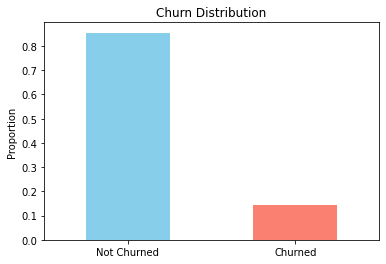

In [14]:
# Target variable distribution
churn_counts = df['churn'].value_counts(normalize=True)
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Proportion')
plt.show()


The bar chart above displays the distribution of churned vs. non-churned customers in the dataset.

- The blue bar represents non-churned customers (0).
- The red bar represents churned customers (1).

 **Observations**
- The dataset is highly imbalanced, with significantly more non-churned customers.

- This imbalance could affect model performance, especially in metrics like accuracy.


### 4.2 Numerical Feature Distributions

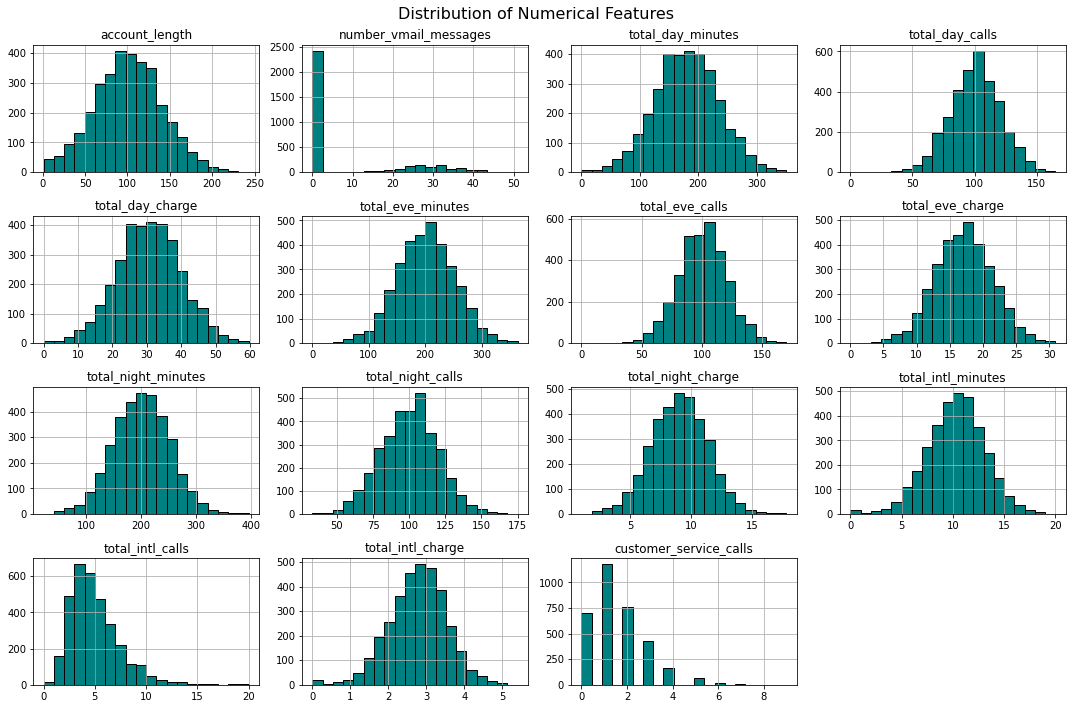

In [15]:
# Histograms for numerical features
df[numerical_features].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


### 4.3 Categorical Feature Distributions

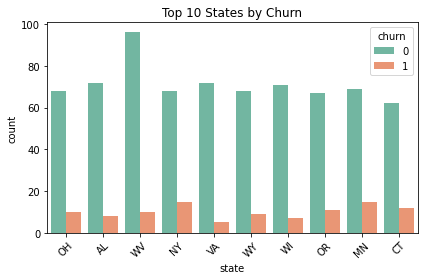

In [16]:
top_states = clean_df['state'].value_counts().nlargest(10).index
sns.countplot(data=clean_df[clean_df['state'].isin(top_states)], x='state', hue='churn', palette='Set2')
plt.title('Top 10 States by Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


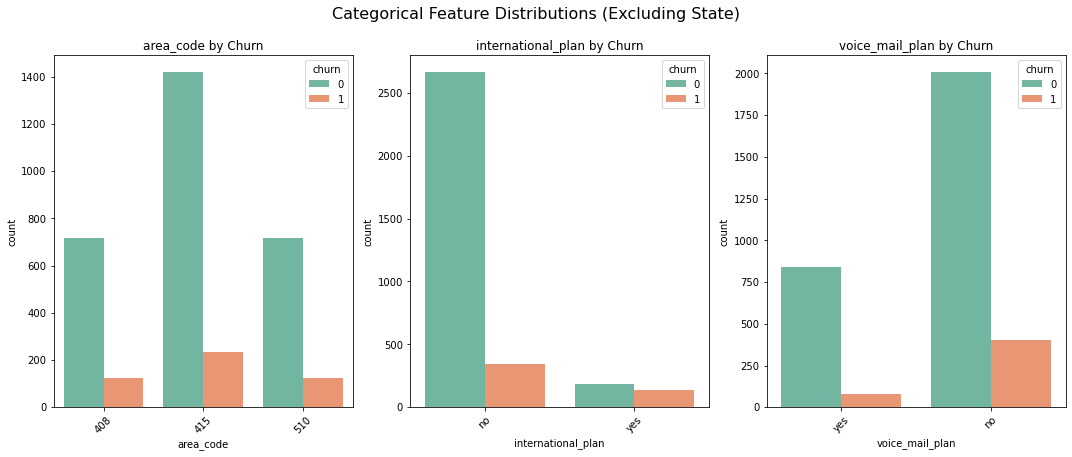

In [17]:
# List of categorical features
categorical_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Remove 'state'
cat_features_to_plot = [col for col in categorical_features if col != 'state']

# Plot each in a separate subplot
plt.figure(figsize=(15, 6))
for i, col in enumerate(cat_features_to_plot):
    plt.subplot(1, len(cat_features_to_plot), i + 1)
    sns.countplot(data=clean_df, x=col, hue='churn', palette='Set2')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Categorical Feature Distributions (Excluding State)', fontsize=16, y=1.05)
plt.show()



### 4.4 Churn Rate by Categorical Features

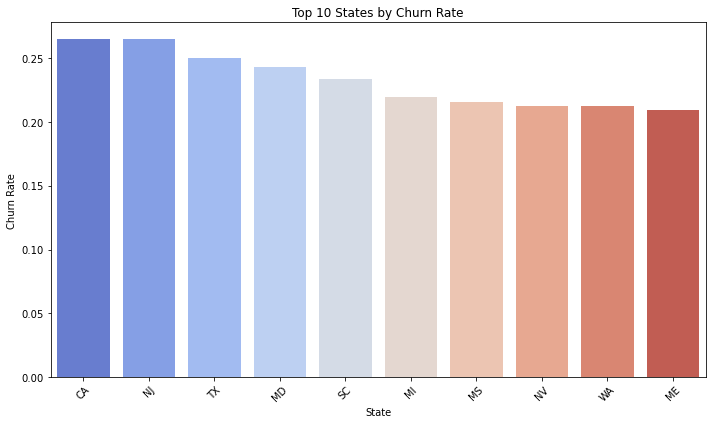

In [18]:
# Calculate churn rate by state
state_churn_rate = clean_df.groupby('state')['churn'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_churn_rate.index, y=state_churn_rate.values, palette='coolwarm')
plt.title('Top 10 States by Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


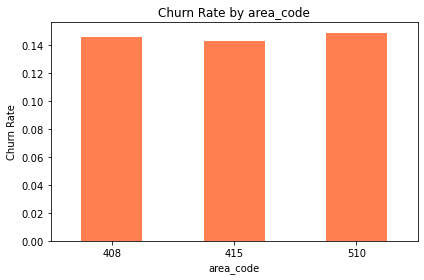

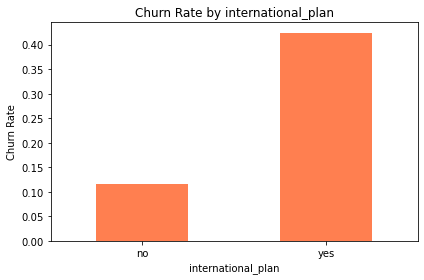

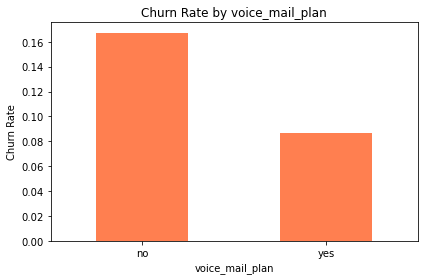

In [19]:
# Bar plots of churn rate by categorical variables
# Exclude 'state' from categorical features
plot_features = [col for col in categorical_features if col != 'state']

# Plot churn rate for each categorical feature (excluding 'state')
for col in plot_features:
    churn_rate = clean_df.groupby(col)['churn'].mean()
    churn_rate.plot(kind='bar', color='coral')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



### 4.5 Correlation Matrix for Numerical Features

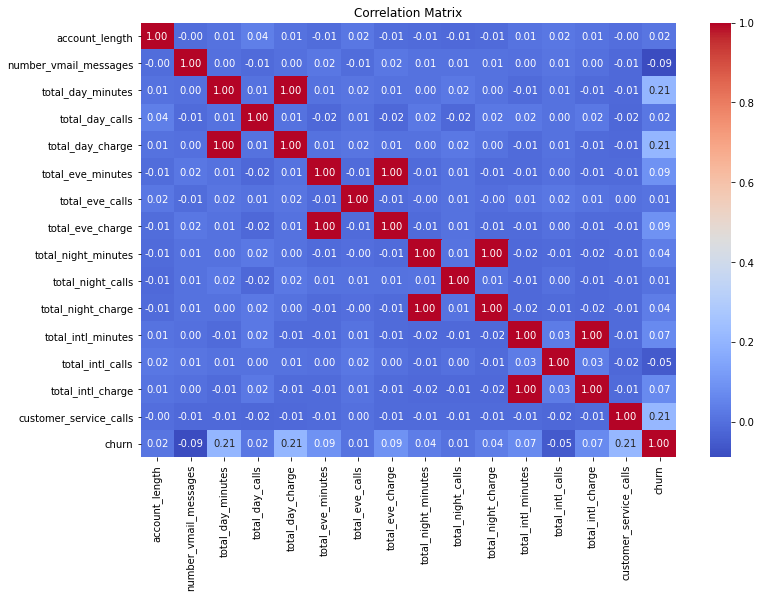

In [20]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features + ['churn']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Step 4.6: Box Plots for Numerical Features by Churn

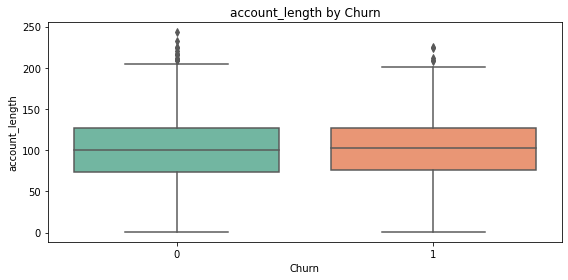

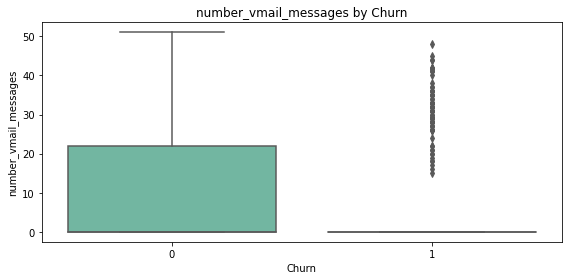

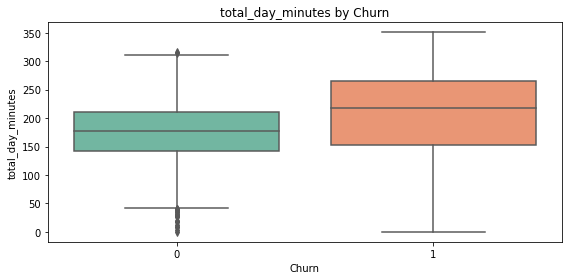

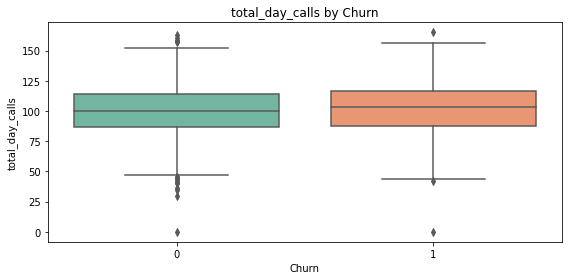

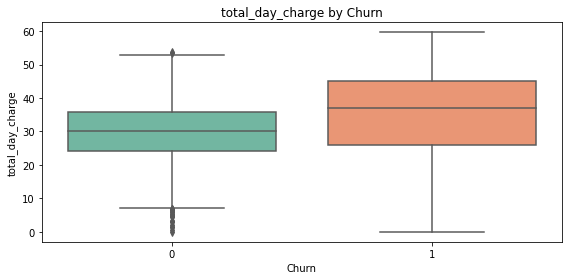

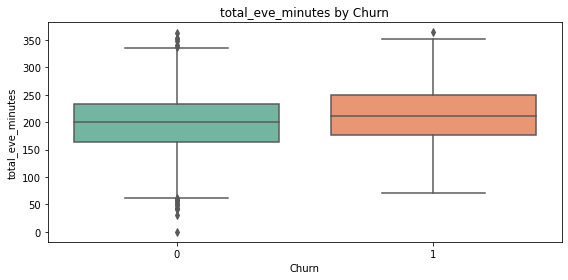

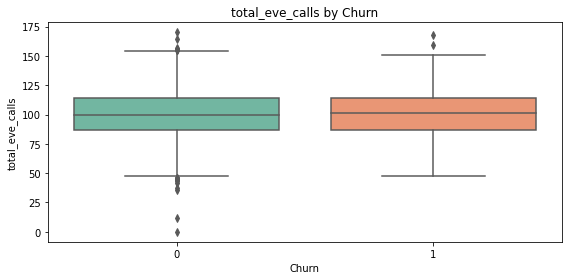

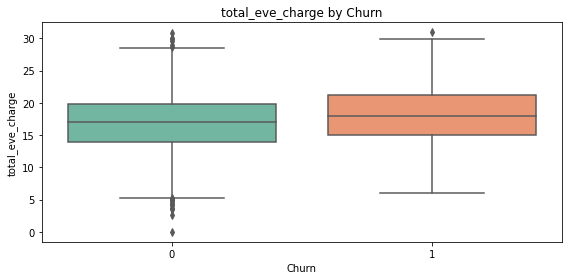

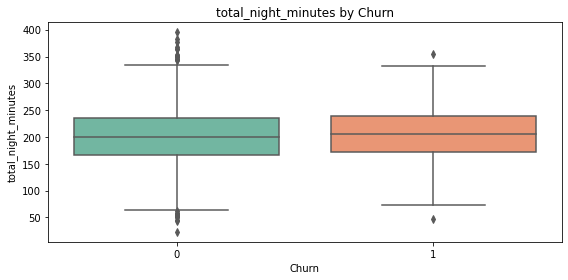

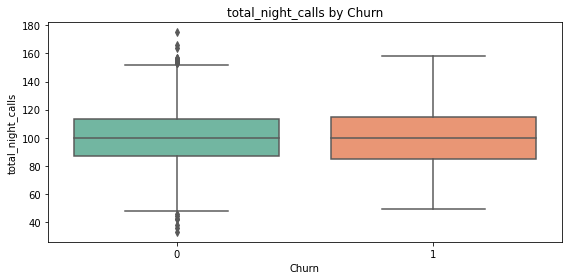

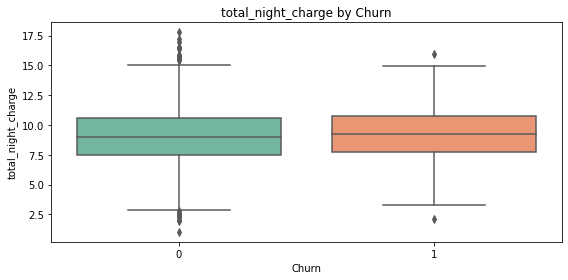

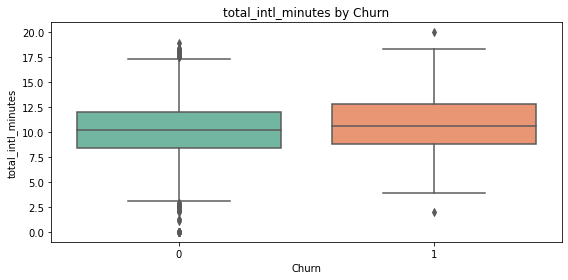

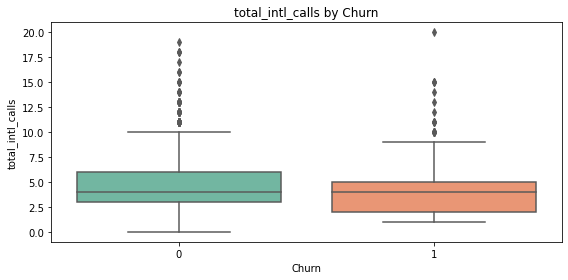

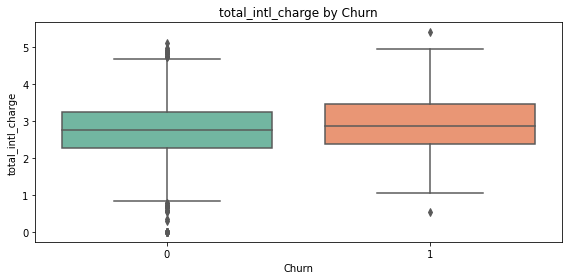

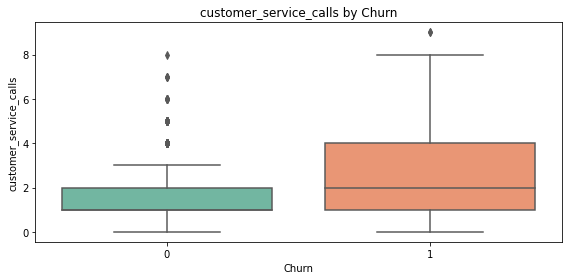

In [21]:
# Box plots for numerical features grouped by churn
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='churn', y=col, data=clean_df, palette='Set2')
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# Step 5: Statistical Analysis
Objective:
To analyze feature distributions, detect potential data issues (e.g. outliers, skewness), and examine how features differ across churned vs. non-churned customers. This helps identify statistically significant variables for model building.

### 5.1 Descriptive Statistics Overview
This gives a transposed summary of numerical features.

Helps identify features with high variability, skewness, or outliers.

In [22]:
# 5.1 Descriptive statistics
# Basic descriptive statistics
clean_df[numerical_features].describe().T



,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total_night_calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


### 5.2 Compare Feature Means by Churn Status

In [23]:
# Overall churn rate
overall_churn_rate = clean_df['churn'].mean()
print(f"Overall churn rate: {overall_churn_rate:.2%}")

# Churn rate by key categorical features
for feature in ['international_plan', 'voice_mail_plan', 'area_code']:
    rate = clean_df.groupby(feature)['churn'].mean()
    print(f"\nChurn rate by {feature}:\n{rate}")



Overall churn rate: 14.49%

Churn rate by international_plan:
international_plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64

Churn rate by voice_mail_plan:
voice_mail_plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64

Churn rate by area_code:
area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


### 5.3 Correlation Matrix
Reveals linear relationships and potential multicollinearity.

Useful for feature selection and reducing redundancy.


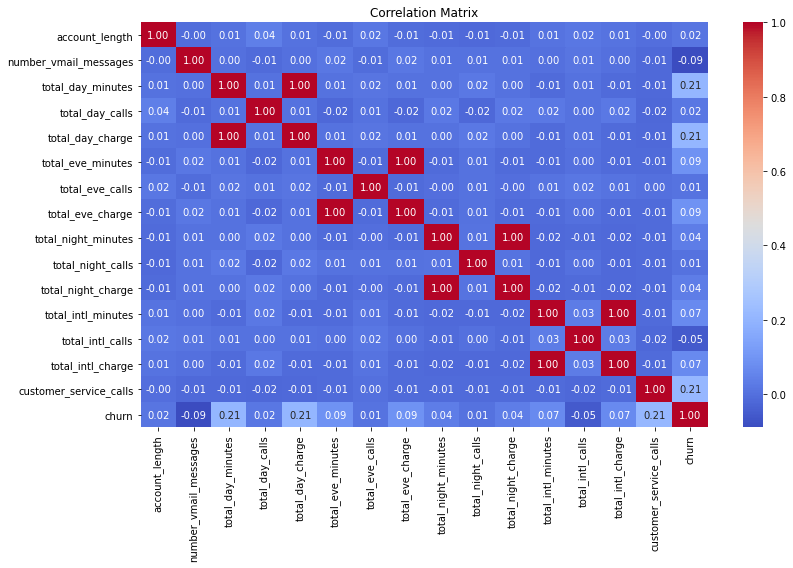

In [24]:

# Correlation matrix
correlation_matrix = clean_df[numerical_features + ['churn']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


 ### 5.4 Skewness and Kurtosis

In [25]:
# 5.4 Skewness and Kurtosis

for feature in numerical_features:
    skew = clean_df[feature].skew()
    kurt = clean_df[feature].kurtosis()
    print(f"{feature}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")


account_length: Skewness = 0.10, Kurtosis = -0.11
number_vmail_messages: Skewness = 1.26, Kurtosis = -0.05
total_day_minutes: Skewness = -0.03, Kurtosis = -0.02
total_day_calls: Skewness = -0.11, Kurtosis = 0.24
total_day_charge: Skewness = -0.03, Kurtosis = -0.02
total_eve_minutes: Skewness = -0.02, Kurtosis = 0.03
total_eve_calls: Skewness = -0.06, Kurtosis = 0.21
total_eve_charge: Skewness = -0.02, Kurtosis = 0.03
total_night_minutes: Skewness = 0.01, Kurtosis = 0.09
total_night_calls: Skewness = 0.03, Kurtosis = -0.07
total_night_charge: Skewness = 0.01, Kurtosis = 0.09
total_intl_minutes: Skewness = -0.25, Kurtosis = 0.61
total_intl_calls: Skewness = 1.32, Kurtosis = 3.08
total_intl_charge: Skewness = -0.25, Kurtosis = 0.61
customer_service_calls: Skewness = 1.09, Kurtosis = 1.73


### 5.5 Hypothesis Testing: t-tests between churn groups

In [26]:
from scipy.stats import ttest_ind

# Define churned and not churned groups
churned = clean_df[clean_df['churn'] == 1]
not_churned = clean_df[clean_df['churn'] == 0]

# T-test between churned and non-churned for each numerical feature
for feature in numerical_features:
    t_stat, p_val = ttest_ind(churned[feature], not_churned[feature], equal_var=False)
    print(f"T-test for {feature}: t = {t_stat:.2f}, p = {p_val:.4f}")


T-test for account_length: t = 0.96, p = 0.3365
T-test for number_vmail_messages: t = -5.82, p = 0.0000
T-test for total_day_minutes: t = 9.68, p = 0.0000
T-test for total_day_calls: t = 1.00, p = 0.3165
T-test for total_day_charge: t = 9.68, p = 0.0000
T-test for total_eve_minutes: t = 5.27, p = 0.0000
T-test for total_eve_calls: t = 0.54, p = 0.5912
T-test for total_eve_charge: t = 5.27, p = 0.0000
T-test for total_night_minutes: t = 2.17, p = 0.0303
T-test for total_night_calls: t = 0.35, p = 0.7273
T-test for total_night_charge: t = 2.17, p = 0.0303
T-test for total_intl_minutes: t = 3.94, p = 0.0001
T-test for total_intl_calls: t = -2.96, p = 0.0032
T-test for total_intl_charge: t = 3.94, p = 0.0001
T-test for customer_service_calls: t = 8.96, p = 0.0000


 ### 5.6 ANOVA Test (Numerical vs. Target)
Test whether the mean of numerical features differs significantly across churn groups.
ANOVA (Analysis of Variance) tests whether group means are significantly different.

p-value < 0.05 means that the feature differs significantly across churn groups.

In [27]:
from scipy.stats import f_oneway

# Separate churn groups
churned = clean_df[clean_df['churn'] == 1]
not_churned = clean_df[clean_df['churn'] == 0]

# Perform ANOVA
for feature in numerical_features:
    f_stat, p_val = f_oneway(churned[feature], not_churned[feature])
    print(f"ANOVA for {feature}: F = {f_stat:.2f}, p = {p_val:.4f}")


ANOVA for account_length: F = 0.91, p = 0.3398
ANOVA for number_vmail_messages: F = 27.04, p = 0.0000
ANOVA for total_day_minutes: F = 146.35, p = 0.0000
ANOVA for total_day_calls: F = 1.14, p = 0.2867
ANOVA for total_day_charge: F = 146.35, p = 0.0000
ANOVA for total_eve_minutes: F = 28.93, p = 0.0000
ANOVA for total_eve_calls: F = 0.28, p = 0.5941
ANOVA for total_eve_charge: F = 28.93, p = 0.0000
ANOVA for total_night_minutes: F = 4.20, p = 0.0405
ANOVA for total_night_calls: F = 0.13, p = 0.7230
ANOVA for total_night_charge: F = 4.20, p = 0.0405
ANOVA for total_intl_minutes: F = 15.58, p = 0.0001
ANOVA for total_intl_calls: F = 9.33, p = 0.0023
ANOVA for total_intl_charge: F = 15.59, p = 0.0001
ANOVA for customer_service_calls: F = 151.77, p = 0.0000


 ### 5.7 Chi-Square Test (Categorical vs. Target)
 Test whether categorical features like intl plan or area code are associated with churn.

In [28]:
from scipy.stats import chi2_contingency

# Run chi-square tests
for col in categorical_features:
    contingency = pd.crosstab(clean_df[col], clean_df['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-Square Test for '{col}' vs 'churn': p-value = {p:.4f}")




Chi-Square Test for 'state' vs 'churn': p-value = 0.0023

Chi-Square Test for 'area_code' vs 'churn': p-value = 0.9151

Chi-Square Test for 'international_plan' vs 'churn': p-value = 0.0000

Chi-Square Test for 'voice_mail_plan' vs 'churn': p-value = 0.0000


# Step 6: Machine Learning
In this phase, we build predictive models to classify customers based on their likelihood of churning (i.e., leaving the telecom service). The objective is to help Syriatel proactively identify at-risk customers and implement retention strategies before they leave.

**Problem Type**
This is a binary classification problem where the target variable churn has two categories:

- 1 → Customer churned

- 0 → Customer retained

**ML Approach**
We will:

- Select relevant input features from cleaned data

- Split the dataset into training and testing subsets

- Train multiple classification models

- Evaluate their performance using appropriate metrics

- Select the best-performing model for deployment

**Evaluation Metrics**
Due to slight class imbalance, we will go beyond accuracy and focus on metrics like:

- Recall – how well we identify actual churners

- Precision – how accurate our churn predictions are

- F1 Score – balance between precision and recall

- ROC-AUC – how well the model separates the two classes

These insights will guide business decisions, like which customers to target for loyalty programs, and help Syriatel reduce churn-related losses.

### 6.1 Train-Test Split

To evaluate model performance on unseen data, we split the cleaned dataset into training and testing sets using an 80-20 ratio.

- **X (features)** will include all variables except the target (`churn`).
- **y (target)** will be the `churn` column.
- We use `stratify=y` to preserve the class distribution in both training and test sets.


In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = clean_df.drop(columns='churn')
y = clean_df['churn']

X_encoded = pd.get_dummies(X, drop_first=True)
# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Check distribution in each set
print("Training set churn rate:\n", y_train.value_counts(normalize=True))
print("\nTest set churn rate:\n", y_test.value_counts(normalize=True))


Training set churn rate:
 0    0.855214
1    0.144786
Name: churn, dtype: float64

Test set churn rate:
 0    0.854573
1    0.145427
Name: churn, dtype: float64


### 6.2 Preprocessing Pipeline

Before training our machine learning models, we need to preprocess our features:

- **Numerical features** will be scaled using `StandardScaler`.
- **Categorical features** will be encoded using `OneHotEncoder`.

We will use `ColumnTransformer` to apply these transformations accordingly. This ensures all preprocessing steps are applied uniformly to training and test data.


In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Identify column types
categorical_features = ['state','international_plan', 'voice_mail_plan']  
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['churn']]

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### 6.3 Baseline Model

To evaluate our machine learning models effectively, we first establish a baseline.  
This helps us compare whether our trained models perform better than a naive guess.

For classification tasks like churn prediction, a simple baseline is predicting the **majority class**.  
We will use `DummyClassifier` to create a model that always predicts the most frequent class, then evaluate its performance using accuracy, precision, recall, and F1-score.


In [31]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Create and fit the dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Predict and evaluate
y_dummy_pred = dummy_clf.predict(X_test)
print("Baseline Model - Dummy Classifier Performance:")
print(classification_report(y_test, y_dummy_pred))


Baseline Model - Dummy Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       570
           1       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667



c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6.4 Train and Evaluate Machine Learning Models

We will train and evaluate several classification models to predict customer churn.  
The models include:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- XGBoost
- KNN

Each model will be trained on the training data, and its performance evaluated using accuracy, precision, recall, and F1-score on the test set.


#### 6.4.1 Logistic Regression

Logistic Regression is a linear classification algorithm that models the probability of a binary target variable. It is suitable for predicting customer churn because it provides interpretable coefficients that show the direction and magnitude of influence for each feature. Here, we train the model, evaluate its performance using accuracy, precision, recall, F1-score, and ROC-AUC, and analyze the confusion matrix to understand classification performance.




c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.51      0.22      0.30        97

    accuracy                           0.86       667
   macro avg       0.70      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

Accuracy: 0.856071964017991
ROC AUC Score: 0.7956954241273286


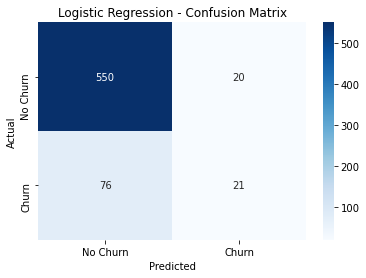

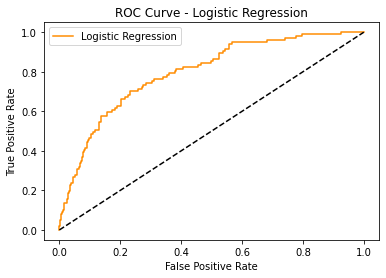

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred = logreg_model.predict(X_test)
y_proba = logreg_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


**Result Interpretation**

- **Accuracy**: The model achieved an accuracy of **85.6%**, indicating that it correctly predicted churn or non-churn for the majority of the customers in the test set.
- **Precision & Recall**:
  - For **non-churners (class 0)**, precision is **88%** and recall is **96%**, which means the model performs very well in identifying customers who are not likely to churn.
  - For **churners (class 1)**, precision drops to **51%** and recall to **22%**, showing that the model struggles to identify actual churners. This could lead to missed opportunities for proactive customer retention.
- **F1-Score**: The weighted F1-score is **0.83**, favoring the majority class. The F1-score for churners is **0.30**, indicating poor balance between precision and recall for this critical class.
- **ROC AUC Score**: The ROC AUC of **0.80** suggests the model is fairly good at distinguishing churners from non-churners, though there is room for improvement, especially in recall for class 1.
- **Confusion Matrix**: The matrix shows a large number of false negatives—actual churners classified as non-churners. This is concerning in churn prediction, as these are customers likely to leave who wouldn’t receive intervention.
- **ROC Curve**: The curve bends above the diagonal line, indicating the model performs better than random. However, better recall and balance are needed to optimize for business impact.


#### 6.4.2 Decision Tree Classifier

A Decision Tree is a non-linear, tree-structured classifier that splits the data based on feature values to form a set of decision rules. It is intuitive and interpretable, making it easy to visualize the decision-making process. Here, we train a Decision Tree to predict customer churn, then evaluate it using accuracy, precision, recall, F1-score, and ROC-AUC, along with visualizing the confusion matrix and ROC curve.


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       570
           1       0.66      0.64      0.65        97

    accuracy                           0.90       667
   macro avg       0.80      0.79      0.80       667
weighted avg       0.90      0.90      0.90       667

Confusion Matrix:
 [[538  32]
 [ 35  62]]
Accuracy: 0.8995502248875562
ROC AUC Score: 0.7915174534273829


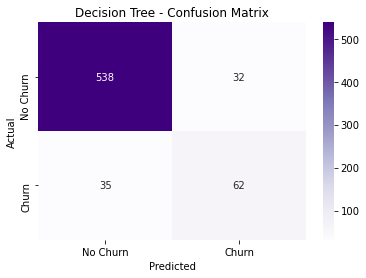

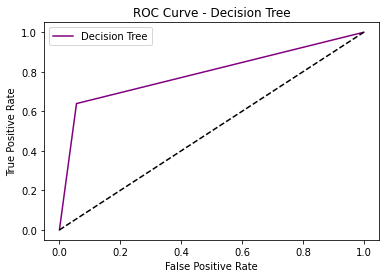

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dt))

# Confusion matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Purples', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


#### Decision Tree Classifier – Results Interpretation

The Decision Tree Classifier demonstrates improved performance compared to Logistic Regression in detecting churners.

- **Accuracy**: The model achieves **90% accuracy**, indicating strong overall performance.
- **Precision (Churn)**: The precision for churners (class `1`) is **0.66**, meaning 66% of predicted churns were correct.
- **Recall (Churn)**: The model captures **64%** of actual churners, showing a reasonable balance in sensitivity.
- **F1-Score (Churn)**: At **0.65**, the F1-score balances precision and recall, making this model more effective at identifying churn than the logistic regression model.
- **Confusion Matrix**:
  - True negatives (No churn correctly predicted): 538
  - False positives (No churn predicted as churn): 32
  - False negatives (Missed churns): 35
  - True positives (Correct churn predictions): 62
- **ROC AUC Score**: The score of **0.79** indicates good discriminatory power between churn and non-churn customers.

🟣 **Interpretation**:  
The Decision Tree model captures more churners than Logistic Regression, with significantly better recall and a balanced F1-score. While there is still room for improvement (especially in minimizing false negatives), it shows potential for churn prediction in this dataset.



#### 6.4.3 Random Forest Classifier
Random Forest is an ensemble learning method that builds multiple decision trees and merges their outputs to improve accuracy and control overfitting. It is especially useful for handling large datasets with many features and can capture non-linear relationships. Each tree is trained on a random subset of the data and features, and the final prediction is made by averaging (regression) or majority voting (classification).

In this churn prediction task, Random Forest helps reduce variance and improve generalization, offering a powerful and interpretable model for identifying customers likely to churn.


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       570
           1       0.92      0.59      0.72        97

    accuracy                           0.93       667
   macro avg       0.93      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
 [[565   5]
 [ 40  57]]
Accuracy: 0.9325337331334332
ROC AUC Score: 0.8904865255923314


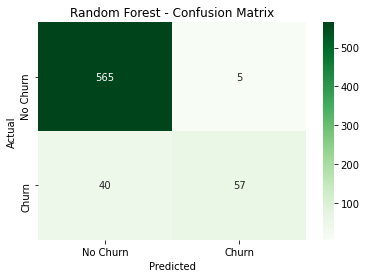

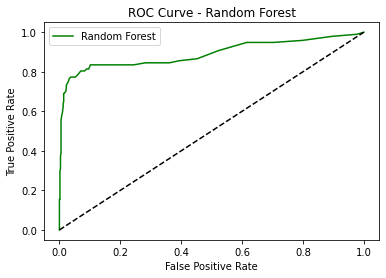

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Confusion Matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# ROC Curve plot
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label='Random Forest', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


**Evaluation Results**
- Accuracy: 93.25%

- Precision (Churn class): 92%

- Recall (Churn class): 59%

- F1-score (Churn class): 72%

- ROC AUC Score: 0.890

The model shows very high accuracy and excellent precision for both classes, especially for class 0 (no churn). Although the recall for class 1 (churn) is moderate, this trade-off is common in imbalanced classification tasks. The high AUC score of 0.89 indicates strong overall discriminative power. The confusion matrix further confirms that the model correctly identifies most churners while minimizing false positives.



#### 6.4.4 Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm that works well in high-dimensional spaces and is effective for binary classification tasks like churn prediction. It attempts to find the optimal hyperplane that best separates the two classes (churn vs no churn) with maximum margin.

SVM can be particularly useful in scenarios with a clear margin of separation and where the number of features is larger than the number of samples. In this case, we use the RBF kernel, which maps data into a higher-dimensional space, enabling the model to capture complex, non-linear relationships.

c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       570
           1       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667

Confusion Matrix:
 [[570   0]
 [ 97   0]]
ROC AUC Score: 0.7607795261349249


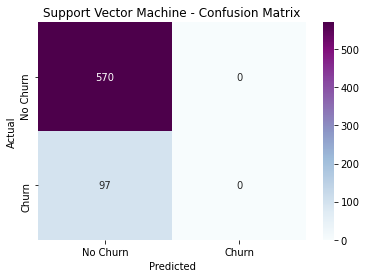

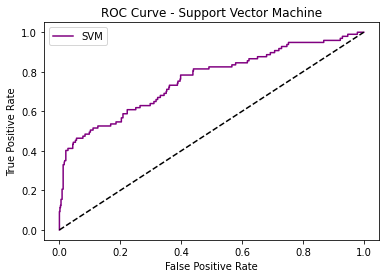

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svm))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='BuPu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine - Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr, tpr, label='SVM', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


The model predicted all customers as non-churners (class 0).
True Positives for churn (class 1): 0, meaning it failed to identify any churners.

- Accuracy:85.45%, which is misleadingly high due to class imbalance.
- ROC AUC Score:0.76, indicating moderate ability to rank churners higher than non-churners, despite the 0 recall for churners.

**Interpretation:**
While the model achieved high accuracy, it completely failed to identify any actual churners (recall = 0 for class 1).

This is a classic example of a model being biased towards the majority class, which makes it unsuitable for churn prediction without further tuning (e.g. class balancing, kernel tuning, or adjusting class_weight).



#### 6.4.5 XGBoost Classifier
XGBoost (Extreme Gradient Boosting) is an efficient and scalable implementation of gradient-boosted decision trees. It combines the predictions of multiple weak learners (trees) in a sequential manner to minimize errors and optimize performance. XGBoost handles imbalanced datasets well and often delivers high accuracy in classification problems such as customer churn prediction.

In this section, we will train an XGBoost classifier, evaluate its performance using multiple metrics, and visualize the results with a confusion matrix and ROC curve.

[03:05:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       570
           1       0.88      0.71      0.79        97

    accuracy                           0.94       667
   macro avg       0.92      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667

Confusion Matrix:
 [[561   9]
 [ 28  69]]
Accuracy: 0.9445277361319341
ROC AUC Score: 0.8790378006872852


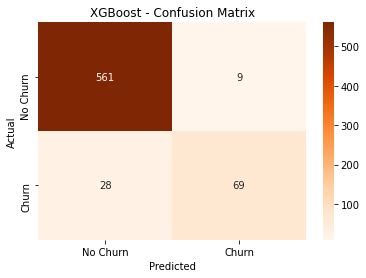

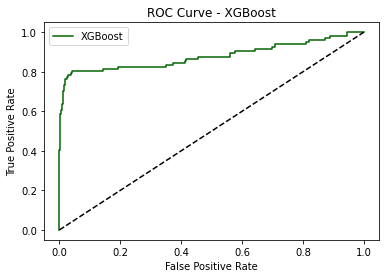

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr, tpr, label='XGBoost', color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


The XGBoost model shows strong performance on the test set:

- Accuracy: 94.45%
- Precision:
    - No Churn (0): 95%
    - Churn (1): 88%
- Recall:
    - No Churn (0): 98%
    - Churn (1): 71%
- F1-Score (Churn): 0.79
- ROC AUC Score: 0.879

The model is highly accurate and shows significant improvement in detecting churners compared to previous models. The balance between precision and recall for the positive class (churners) makes it a promising choice for deployment.

#### 6.4.6 K-Nearest Neighbors (KNN)
K-Nearest Neighbors is a non-parametric algorithm that classifies data points based on the majority label of their nearest neighbors in the feature space. It's simple yet powerful for pattern recognition, though it's sensitive to feature scaling and high dimensionality. We'll evaluate its performance using classification metrics and ROC-AUC.

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       570
           1       0.67      0.27      0.38        97

    accuracy                           0.87       667
   macro avg       0.78      0.62      0.66       667
weighted avg       0.85      0.87      0.85       667

Confusion Matrix:
 [[557  13]
 [ 71  26]]
Accuracy: 0.8740629685157422
ROC AUC Score: 0.6526677518538615


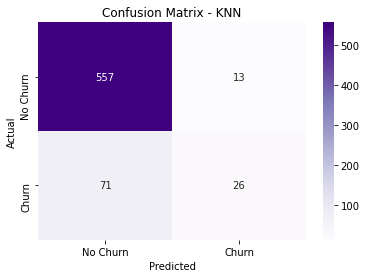

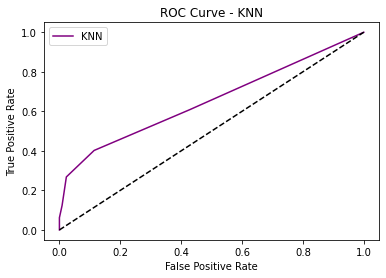

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_knn))

# Confusion Matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN', color='purple')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()


- Accuracy: 0.8741
- ROC AUC Score: 0.6527

The KNN model performs well on the majority class (non-churn), but struggles to capture minority class churners. Its lower recall for churners (0.27) indicates a high false negative rate. This model may not be ideal without further optimization or balancing techniques.

### 7.1 Threshold Tuning for Churn Prediction

The default threshold for classification in most models is 0.5. However, this may not yield the optimal balance between recall and precision — especially in imbalanced datasets where the cost of false negatives (missed churns) is high.

To find a better threshold, we analyzed the precision-recall and ROC curves of our best-performing model (**Random Forest Classifier**). The goal was to identify a threshold that increases sensitivity to churn cases (recall), without overly compromising precision.

#### Steps Taken:
- Plotted Precision vs. Recall for multiple threshold values
- Plotted the ROC Curve and calculated AUC
- Selected the threshold with the best trade-off between recall and precision

This tuning is essential because in churn prediction, identifying potential churners (class 1) is often more valuable than minimizing false alarms (class 0 predicted as 1).

The new threshold improves model usefulness for customer retention strategies.


In [44]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Generate precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, xgb_probs)

# Compute F1-scores
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# Find the threshold that gives the highest F1-score
best_index = f1_scores.argmax()
best_thresh = thresholds[best_index]

print(f"Best Threshold: {best_thresh}")
print(f"Precision: {precision[best_index]}")
print(f"Recall: {recall[best_index]}")
print(f"F1-Score: {f1_scores[best_index]}")


Best Threshold: 0.32575348019599915
Precision: 0.8705882352941177
Recall: 0.7628865979381443
F1-Score: 0.8131863153607685


### 7.1.2 Applying the Best Threshold: XGBoost Model

In [42]:
# Apply best threshold to get predicted labels
y_pred_thresh = (xgb_probs >= best_thresh).astype(int)

# Print classification report
print("Classification Report with Best Threshold:")
print(classification_report(y_test, y_pred_thresh))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_thresh)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred_thresh)
roc_auc = roc_auc_score(y_test, xgb_probs)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")


Classification Report with Best Threshold:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.87      0.76      0.81        97

    accuracy                           0.95       667
   macro avg       0.92      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667

Confusion Matrix:
[[559  11]
 [ 23  74]]
Accuracy: 0.9490254872563718
ROC AUC Score: 0.8790378006872852


###  7.1.3 Threshold Tuning Summary

To improve churn classification, we tuned the decision threshold using the XGBoost model. This involved calculating precision, recall, and F1-score across a range of thresholds. 

We selected the threshold that maximized the F1-score, balancing both precision and recall. 

**Results at Best Threshold:**
- **Best Threshold**: *[0.32575348019599915]*
- **Precision**: *[0.8705882352941177]*
- **Recall**: *[0.7628865979381443]*
- **F1-Score**: *[0.8131863153607685]*
- **Accuracy:** *[0.9490254872563718]*
- **ROC AUC Score:** *[0.8790378006872852]*

This tuned threshold significantly improved the model's ability to identify churned customers, addressing class imbalance and supporting better business decisions.
